```{title} Tree Data Structure
```
# Tree

A tree is a widely used abstract data structure that simulates a hierarchical tree structure, with a root value and subtrees of children represented as a set of linked nodes. It is a non-linear data structure compared to arrays, linked lists, stacks, and queues which are linear data structures.

## Key Terminologies

- **Node**: The fundamental part of a tree which contains data and links to other nodes.
- **Root**: The top node in a tree.
- **Edge**: The link between any two nodes.
- **Child**: A node directly connected to another node when moving away from the Root.
- **Parent**: The converse notion of a child.
- **Leaf**: A node with no children.
- **Subtree**: A tree formed by a node and its descendants.
- **Depth**: The length of the path from the root to the node.
- **Height**: The length of the path from the node to the deepest leaf.

```{image} https://github.com/akkefa/ml-notes/releases/download/v0.1.0/Treedatastructure.png
:align: center
:alt: Combination
:width: 80%
```

## Types of Trees

- **Binary Tree**: Each node has at most two children.
- **Binary Search Tree (BST)**: A binary tree where the left child contains only nodes with values less than the parent node, and the right child only nodes with values greater than the parent node.
- **Balanced Tree**: A tree where the height of the left and right subtree of any node differ by not more than one.
- **AVL Tree, Red-Black Tree, B-Tree**: Self-balancing binary search trees.


**Implementing Trees in Python**

Python doesn't have a built-in tree data structure, but it can be implemented using classes and objects.

Implementing a Node

Creating a Binary Tree

In [3]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [4]:
# Creating nodes
root = Node(1)
root.left = Node(2)
root.right = Node(3)

# Adding more nodes
root.left.left = Node(4)
root.left.right = Node(5)

### Binary Search Tree
A Binary Search Tree (BST) is a special type of binary tree in which the left child of a node has a value less than the node’s value and the right child has a value greater than the node’s value. This property is called the BST property and it makes it possible to efficiently search, insert, and delete elements in the tree.

In a Binary search tree, the value of left node must be smaller than the parent node, and the value of right node must be greater than the parent node. This rule is applied recursively to the left and right subtrees of the root.

**Left node > Parent node > Right node**

```{image} https://media.geeksforgeeks.org/wp-content/cdn-uploads/20221215114732/bst-21.png
:align: center
:alt: Binary Search Tree
:width: 80%
```

#### Advantages of Binary search tree
Searching an element in the Binary search tree is easy as we always have a hint that which subtree has the desired element.

As compared to array and linked lists, insertion and deletion operations are faster in BST.

```python

class Node: 
    # Implement a node of the binary search tree.
    # Constructor for a node with key and a given parent
    # parent can be None for a root node.
    def __init__(self, key, parent = None): 
        self.key = key
        self.parent = parent 
        self.left = None # We will set left and right child to None
        self.right = None
        # Make sure that the parent's left/right pointer
        # will point to the newly created node.
        if parent != None:
            if key < parent.key:
                assert(parent.left == None), 'parent already has a left child -- unable to create node'
                parent.left = self
            else: 
                assert key > parent.key, 'key is same as parent.key. We do not allow duplicate keys in a BST since it breaks some of the algorithms.'
                assert(parent.right == None ), 'parent already has a right child -- unable to create node'
                parent.right = self
        
    # Utility function that keeps traversing left until it finds 
    # the leftmost descendant
    def get_leftmost_descendant(self):
        if self.left != None:
            return self.left.get_leftmost_descendant()
        else:
            return self
    

    # You can call search recursively on left or right child
    # as appropriate.
    # If search succeeds: return a tuple True and the node in the tree
    # with the key we are searching for.
    # Also note that if the search fails to find the key 
    # you should return a tuple False and the node which would
    # be the parent if we were to insert the key subsequently.
    def search(self, key):
        if self.key == key: 
            return (True, self)
        # your code here
        if self.key < key and self.right != None:
            return self.right.search(key)

        if self.key > key and self.left != None:
            return self.left.search(key)
        
        return (False, self)
        
        
        
    # To insert first search for it and find out
    # the parent whose child the currently inserted key will be.
    # Create a new node with that key and insert.
    # return None if key already exists in the tree.
    # return the new node corresponding to the inserted key otherwise.
    def insert(self, key):
        # your code here
        (b, found_node) = self.search(key)
        if b is not False:
            return None
        else:
            return Node(key, found_node)
        
        
    # height of a node whose children are both None is defined
    # to be 1.
    # height of any other node is 1 + maximum of the height 
    # of its children.
    # Return a number that is th eheight.
    def height(self):
        # your code here
        if self.left is None and self.right is None:
            return 1
        elif self.left is None:
            return 1 + self.right.height()
        elif self.right is None:
            return 1 + self.left.height()
        else:
            return 1 + max(self.left.height(), self.right.height())
        
    
    # programming.
    # Case 1: both children of the node are None
    #   -- in this case, deletion is easy: simply find out if the node with key is its
    #      parent's left/right child and set the corr. child to None in the parent node.
    # Case 2: one of the child is None and the other is not.
    #   -- replace the node with its only child. In other words,
    #      modify the parent of the child to be the to be deleted node's parent.
    #      also change the parent's left/right child appropriately.
    # Case 3: both children of the parent are not None.
    #    -- first find its successor (go one step right and all the way to the left).
    #    -- function get_leftmost_descendant may be helpful here.
    #    -- replace the key of the node by its successor.
    #    -- delete the successor node.
    # return: no return value specified
    
    def delete(self, key):
        (found, node_to_delete) = self.search(key)
        assert(found == True), f"key to be deleted:{key}- does not exist in the tree"
        # your code here
        if node_to_delete.left is None and node_to_delete.right is None:
            if node_to_delete.parent.left == node_to_delete:
                node_to_delete.parent.left = None
            else:
                node_to_delete.parent.right = None
        elif node_to_delete.left is None:
            if node_to_delete.parent.left == node_to_delete:
                node_to_delete.parent.left = node_to_delete.right
            else:
                node_to_delete.parent.right = node_to_delete.right
        elif node_to_delete.right is None:
            if node_to_delete.parent.left == node_to_delete:
                node_to_delete.parent.left = node_to_delete.left
            else:
                node_to_delete.parent.right = node_to_delete.left
        else:
            successor = node_to_delete.right.get_leftmost_descendant()
            node_to_delete.key = successor.key
            successor.delete(successor.key)

t1 = Node(25, None)
t2 = Node(12, t1)
t3 = Node(18, t2)
t4 = Node(40, t1)

print('-- Testing basic node construction (originally provided code) -- ')
assert(t1.left == t2), 'test 1 failed'
assert(t2.parent == t1),  'test 2 failed'
assert(t2.right == t3), 'test 3 failed'
assert (t3.parent == t2), 'test 4 failed'
assert(t1.right == t4), 'test 5 failed'
assert(t4.left == None), 'test 6 failed'
assert(t4.right == None), 'test 7 failed'
# The tree should be : 
#             25
#             /\
#         12     40
#         /\
#     None  18
#

print('-- Testing search -- ')
(b, found_node) = t1.search(18)
assert b and found_node.key == 18, 'test 8 failed'
(b, found_node) = t1.search(25)
assert b and found_node.key == 25, 'test 9 failed -- you should find the node with key 25 which is the root'
(b, found_node) = t1.search(26)
assert(not b), 'test 10 failed'
assert(found_node.key == 40), 'test 11 failed -- you should be returning the leaf node which would be the parent to the node you failed to find if it were to be inserted in the tree.'

print('-- Testing insert -- ')
ins_node = t1.insert(26)
assert ins_node.key == 26, ' test 12 failed '
assert ins_node.parent == t4,  ' test 13 failed '
assert t4.left == ins_node,  ' test 14 failed '

ins_node2 = t1.insert(33)
assert ins_node2.key == 33, 'test 15 failed'
assert ins_node2.parent == ins_node, 'test 16 failed'
assert ins_node.right == ins_node2, 'test 17 failed'

print('-- Testing height -- ')

assert t1.height() == 4, 'test 18 failed'
assert t4.height() == 3, 'test 19 failed'
assert t2.height() == 2, 'test 20 failed'


# Testing deletion
t1 = Node(16, None)
# insert the nodes in the list
lst = [18,25,10, 14, 8, 22, 17, 12]
for elt in lst:
    t1.insert(elt)

# The tree should look like this
#               16
#            /     \
#          10      18
#        /  \     /  \
#       8   14   17  25
#          /         /  
#         12        22


# Let us test the three deletion cases.
# case 1 let's delete node 8
# node 8 does not have left or right children.
t1.delete(8) # should have both children nil.
(b8,n8) = t1.search(8)
assert not b8, 'Test A: deletion fails to delete node.'
(b,n) = t1.search(10)
assert( b) , 'Test B failed: search does not work'
assert n.left == None, 'Test C failed: Node 8 was not properly deleted.'

# Let us test deleting the node 14 whose right child is none.
# n is still pointing to the node 10 after deleting 8.
# let us ensure that it's right child is 14
assert n.right != None, 'Test D failed: node 10 should have right child 14'
assert n.right.key == 14, 'Test E failed: node 10 should have right child 14'

# Let's delete node 14
t1.delete(14)
(b14, n14) = t1.search(14)
assert not b14, 'Test F: Deletion of node 14 failed -- it still exists in the tree.'
(b,n) = t1.search(10)
assert n.right != None , 'Test G failed: deletion of node 14 not handled correctly'
assert n.right.key == 12, f'Test H failed: deletion of node 14 not handled correctly: {n.right.key}'

# Let's delete node 18 in the tree. 
# It should be replaced by 22.

t1.delete(18)
(b18, n18) = t1.search(18)
assert not b18, 'Test I: Deletion of node 18 failed'
assert t1.right.key == 22 , ' Test J: Replacement of node with successor failed.'
assert t1.right.right.left == None, ' Test K: replacement of node with successor failed -- you did not delete the successor leaf properly?'


```

#### Height of BST
The height of a Binary Tree is defined as the maximum depth of any leaf node from the root node. That is, it is the length of the longest path from the root node to any leaf node.


```{image} https://journaldev.nyc3.digitaloceanspaces.com/2020/01/Binary_Tree_Ht.png
:align: center
:alt: Binary Search Tree
:width: 50%
```
#### Find in BST

Complexity: O(log n) and O(n) in worst case


#### Insertion and Deletion in BST

```python
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert(root, key):
    if root is None:
        return Node(key)
    else:
        if root.val == key:
            return root
        elif root.val < key:
            root.right = insert(root.right, key)
        else:
            root.left = insert(root.left, key)
    return root

def inorder(root):
    if root:
        inorder(root.left)
        print(root.val, end =" ")
        inorder(root.right)


if __name__ == '__main__':

    # Let us create the following BST
    # 50
    #  /     \
    # 30     70
    #  / \ / \
    # 20 40 60 80

    r = Node(50)
    r = insert(r, 30)
    r = insert(r, 20)
    r = insert(r, 40)
    r = insert(r, 70)
    r = insert(r, 60)
    r = insert(r, 80)

    # Print inorder traversal of the BST
    inorder(r)

```


Delete a node from BST

```python
# Python program to demonstrate delete operation
# in binary search tree

# A Binary Tree Node


class Node:

	# Constructor to create a new node
	def __init__(self, key):
		self.key = key
		self.left = None
		self.right = None


# A utility function to do inorder traversal of BST
def inorder(root):
	if root is not None:
		inorder(root.left)
		print(root.key, end=" ")
		inorder(root.right)


# A utility function to insert a
# new node with given key in BST
def insert(node, key):

	# If the tree is empty, return a new node
	if node is None:
		return Node(key)

	# Otherwise recur down the tree
	if key < node.key:
		node.left = insert(node.left, key)
	else:
		node.right = insert(node.right, key)

	# return the (unchanged) node pointer
	return node

# Given a non-empty binary
# search tree, return the node
# with minimum key value
# found in that tree. Note that the
# entire tree does not need to be searched


def minValueNode(node):
	current = node

	# loop down to find the leftmost leaf
	while(current.left is not None):
		current = current.left

	return current

# Given a binary search tree and a key, this function
# delete the key and returns the new root


def deleteNode(root, key):

	# Base Case
	if root is None:
		return root

	# If the key to be deleted
	# is smaller than the root's
	# key then it lies in left subtree
	if key < root.key:
		root.left = deleteNode(root.left, key)

	# If the kye to be delete
	# is greater than the root's key
	# then it lies in right subtree
	elif(key > root.key):
		root.right = deleteNode(root.right, key)

	# If key is same as root's key, then this is the node
	# to be deleted
	else:

		# Node with only one child or no child
		if root.left is None:
			temp = root.right
			root = None
			return temp

		elif root.right is None:
			temp = root.left
			root = None
			return temp

		# Node with two children:
		# Get the inorder successor
		# (smallest in the right subtree)
		temp = minValueNode(root.right)

		# Copy the inorder successor's
		# content to this node
		root.key = temp.key

		# Delete the inorder successor
		root.right = deleteNode(root.right, temp.key)

	return root


# Driver code
""" Let us create following BST
			50
		/	 \
		30	 70
		/ \ / \
	20 40 60 80 """

root = None
root = insert(root, 50)
root = insert(root, 30)
root = insert(root, 20)
root = insert(root, 40)
root = insert(root, 70)
root = insert(root, 60)
root = insert(root, 80)

print("Inorder traversal of the given tree")
inorder(root)

print("\nDelete 20")
root = deleteNode(root, 20)
print("Inorder traversal of the modified tree")
inorder(root)

print("\nDelete 30")
root = deleteNode(root, 30)
print("Inorder traversal of the modified tree")
inorder(root)

print("\nDelete 50")
root = deleteNode(root, 50)
print("Inorder traversal of the modified tree")
inorder(root)

# This code is contributed by Nikhil Kumar Singh(nickzuck_007)



```
#### Traversals – Inorder, Preorder, Post Order
Given a Binary Search Tree, The task is to print the elements in inorder, preorder, and postorder traversal of the Binary Search Tree. 


```{image} https://media.geeksforgeeks.org/wp-content/uploads/20220730030128/Screenshot20220730at30104AM-660x431.png
:align: center
:alt: Binary Search Tree
:width: 70%
```

Inorder Traversal: 10 20 30 100 150 200 300

Preorder Traversal: 100 20 10 30 200 150 300

Postorder Traversal: 10 30 20 150 300 200 100

##### Inorder Traversal:

Traverse left subtree
Visit the root and print the data.
Traverse the right subtree


```python
class Node:
	def __init__(self, v):
		self.left = None
		self.right = None
		self.data = v

# Inorder Traversal
def printInorder(root):
	if root:
		# Traverse left subtree
		printInorder(root.left)
		
		# Visit node
		print(root.data,end=" ")
		
		# Traverse right subtree
		printInorder(root.right)

# Driver code
if __name__ == "__main__":
	# Build the tree
	root = Node(100)
	root.left = Node(20)
	root.right = Node(200)
	root.left.left = Node(10)
	root.left.right = Node(30)
	root.right.left = Node(150)
	root.right.right = Node(300)

	# Function call
	print("Inorder Traversal:",end=" ")
	printInorder(root)

	# This code is contributed by ajaymakvana.
```

##### Preorder Traversal
At first visit the root then traverse left subtree and then traverse the right subtree.

Follow the below steps to implement the idea:

- Visit the root and print the data.
- Traverse left subtree
- Traverse the right subtree


```{python}
class Node:
	def __init__(self, v):
		self.data = v
		self.left = None
		self.right = None

# Preorder Traversal
def printPreOrder(node):
	if node is None:
		return
	# Visit Node
	print(node.data, end = " ")

	# Traverse left subtree
	printPreOrder(node.left)

	# Traverse right subtree
	printPreOrder(node.right)

# Driver code
if __name__ == "__main__":
	# Build the tree
	root = Node(100)
	root.left = Node(20)
	root.right = Node(200)
	root.left.left = Node(10)
	root.left.right = Node(30)
	root.right.left = Node(150)
	root.right.right = Node(300)

	# Function call
	print("Preorder Traversal: ", end = "")
	printPreOrder(root)

```

##### Postorder Traversal
At first traverse left subtree then traverse the right subtree and then visit the root.

Follow the below steps to implement the idea:

- Traverse left subtree
- Traverse the right subtree
- Visit the root and print the data.

```python

class Node:
	def __init__(self, v):
		self.data = v
		self.left = None
		self.right = None

# Preorder Traversal
def printPostOrder(node):
	if node is None:
		return

	# Traverse left subtree
	printPostOrder(node.left)

	# Traverse right subtree
	printPostOrder(node.right)
	
	# Visit Node
	print(node.data, end = " ")

# Driver code
if __name__ == "__main__":
	# Build the tree
	root = Node(100)
	root.left = Node(20)
	root.right = Node(200)
	root.left.left = Node(10)
	root.left.right = Node(30)
	root.right.left = Node(150)
	root.right.right = Node(300)

	# Function call
	print("Postorder Traversal: ", end = "")
	printPostOrder(root)


```

### Red-Black Tree
When it comes to searching and sorting data, one of the most fundamental data structures is the binary search tree. However, the performance of a binary search tree is highly dependent on its shape, and in the worst case, it can degenerate into a linear structure with a time complexity of O(n). This is where Red Black Trees come in, they are a type of balanced binary search tree that use a specific set of rules to ensure that the tree is always balanced. This balance guarantees that the time complexity for operations such as insertion, deletion, and searching is always O(log n), regardless of the initial shape of the tree.

Red Black Trees are self-balancing, meaning that the tree adjusts itself automatically after each insertion or deletion operation. It uses a simple but powerful mechanism to maintain balance, by coloring each node in the tree either red or black. 

#### Properties of Red Black Tree

The Red-Black tree satisfies all the properties of binary search tree in addition to that it satisfies following additional properties –

1. Root property: The root is black.

2. External property: Every leaf (Leaf is a NULL child of a node) is black in Red-Black tree.

3. Internal property: The children of a red node are black. Hence possible parent of red node is a black node.

4. Depth property: All the leaves have the same black depth.

5. Path property: Every simple path from root to descendant leaf node contains same number of black nodes. 

The result of all these above-mentioned properties is that the Red-Black tree is roughly balanced.


### Spanning Trees
A spanning tree is a sub-graph of an undirected connected graph, which includes all the vertices of the graph with a minimum possible number of edges. If a vertex is missed, then it is not a spanning tree. The edges may or may not have weights assigned to them.


```{image} https://he-s3.s3.amazonaws.com/media/uploads/146b47a.jpg
:alt: Spanning Tree
:width: 70%
:align: center
```

#### Minimum Spanning Tree

A minimum spanning tree is a spanning tree with the minimum possible sum of edge weights. The edges may or may not have weights assigned to them.

```{image} https://he-s3.s3.amazonaws.com/media/uploads/146b47a.jpg
:alt: Minimum Spanning Tree
:width: 70%
:align: center
```
#### Finding Minimum Spanning Tree
There are many algorithms to find the minimum spanning tree. The most common ones are:

* Kruskal's Algorithm
* Prim's Algorithm

### Kruskal's Algorithm

Kruskal's algorithm is a greedy algorithm that finds a minimum spanning tree for a connected weighted graph. This means it finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized. If the graph is not connected, then it finds a minimum spanning forest (a minimum spanning tree for each connected component).

Algorithm Steps:

* Sort the graph edges with respect to their weights.
* Start adding edges to the MST from the edge with the smallest weight until the edge of the largest weight.
* Only add edges which doesn't form a cycle , edges which connect only disconnected components.

```{image} https://he-s3.s3.amazonaws.com/media/uploads/6322896.jpg
:alt: Kruskal's Algorithm
:width: 70%
:align: center
```



## Tree Traversals

Traversal means visiting all the nodes of the tree. There are several ways to traverse a tree:

### Depth-First Traversal

1. **Inorder Traversal (Left, Root, Right)**


In [6]:
def inorder(root):
    if root:
        inorder(root.left)
        print(root.value, end=' ')
        inorder(root.right)

inorder(root)

4 2 5 1 3 

2. **Preorder Traversal (Root, Left, Right)**

In [8]:
def preorder(root):
    if root:
        print(root.value, end=' ')
        preorder(root.left)
        preorder(root.right)

preorder(root)

1 2 4 5 3 

3. **Postorder Traversal (Left, Right, Root)**

In [10]:
def postorder(root):
    if root:
        postorder(root.left)
        postorder(root.right)
        print(root.value, end=' ')

postorder(root)

4 5 2 3 1 

### Breadth-First Traversal (Level Order Traversal)

In [11]:
from collections import deque

def level_order(root):
    if root is None:
        return
    
    queue = deque()
    queue.append(root)
    
    while queue:
        node = queue.popleft()
        print(node.value, end=' ')
        
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)


level_order(root)


1 2 3 4 5 

## Step-by-Step Traversal

We'll use Python to generate these step-by-step outputs for the following traversal methods:

1. Inorder Traversal (Recursive)
2. Preorder Traversal (Recursive)
3. Postorder Traversal (Recursive)
4. Level Order Traversal (Iterative)
5. Inorder Traversal (Iterative)
6. Preorder Traversal (Iterative)
7. Postorder Traversal (Iterative)
   
We'll use this binary tree:

```
        1
      /   \
     2     3
    / \     \
   4   5     6
        \
         7
```

In [12]:
root = Node(1)

root.left = Node(2)
root.right = Node(3)

root.left.left = Node(4)
root.left.right = Node(5)

root.right.right = Node(6)

root.left.right.right = Node(7)



Example with a Skewed Tree (Uncomment the below code)

```
    1
   /
  2
 /
3
 \
  4
   \
    5
```

In [78]:
# root = Node(1)
# root.left = Node(2)
# root.left.left = Node(3)
# root.left.left.right = Node(4)
# root.left.left.right.right = Node(5)


### Inorder Traversal (Recursive)

Traversal Order: Left, Root, Right


In [17]:
from IPython.display import display, HTML

In [46]:
def inorder_with_steps(node, depth=0):
    if node:
        print("-" * depth + "->" + f"Entering Left Subtree of Node {node.value}")
        inorder_with_steps(node.left, depth + 1)
        display(HTML("-" * depth + "->" + f"<b>Visiting Node {node.value} </b>"))
        # print(node.value, end=' ')
        print("-" * depth + "->" + f"Entering Right Subtree of Node {node.value}")
        inorder_with_steps(node.right, depth + 1)
    else:
        print("-" * depth + "->" + "Reached None")

In [47]:
display(HTML("<b>Inorder Traversal with Steps: </b> \n"))
inorder_with_steps(root)

->Entering Left Subtree of Node 1
-->Entering Left Subtree of Node 2
--->Entering Left Subtree of Node 4
---->Reached None


--->Entering Right Subtree of Node 4
---->Reached None


-->Entering Right Subtree of Node 2
--->Entering Left Subtree of Node 5
---->Reached None


--->Entering Right Subtree of Node 5
---->Entering Left Subtree of Node 7
----->Reached None


---->Entering Right Subtree of Node 7
----->Reached None


->Entering Right Subtree of Node 1
-->Entering Left Subtree of Node 3
--->Reached None


-->Entering Right Subtree of Node 3
--->Entering Left Subtree of Node 6
---->Reached None


--->Entering Right Subtree of Node 6
---->Reached None


4 2 7 5 1 3 6

### Preorder Traversal (Recursive)

Traversal Order: Root, Left, Right

In [56]:
def preorder_with_steps(node, depth=0):
    if node:
        display(HTML("-" * depth + "->" + f"<b>Visiting Node {node.value} </b>"))
        # print(node.value, end=' ')
        print("-" * depth + "->" + f"Entering Left Subtree of Node {node.value}")
        preorder_with_steps(node.left, depth + 1)
        print("-" * depth + "->" + f"Entering Right Subtree of Node {node.value}")
        preorder_with_steps(node.right, depth + 1)
    else:
        print("-" * depth + "->" + "Reached None")

In [57]:
display(HTML("<b>Preorder Traversal with Steps </b> \n"))

preorder_with_steps(root)

->Entering Left Subtree of Node 1


-->Entering Left Subtree of Node 2


--->Entering Left Subtree of Node 4
---->Reached None
--->Entering Right Subtree of Node 4
---->Reached None
-->Entering Right Subtree of Node 2


--->Entering Left Subtree of Node 5
---->Reached None
--->Entering Right Subtree of Node 5


---->Entering Left Subtree of Node 7
----->Reached None
---->Entering Right Subtree of Node 7
----->Reached None
->Entering Right Subtree of Node 1


-->Entering Left Subtree of Node 3
--->Reached None
-->Entering Right Subtree of Node 3


--->Entering Left Subtree of Node 6
---->Reached None
--->Entering Right Subtree of Node 6
---->Reached None


### Postorder Traversal (Recursive)

Traversal Order: Left, Right, Root

In [58]:
def postorder_with_steps(node, depth=0):
    if node:
        print("-" * depth + "->" + f"Entering Left Subtree of Node {node.value}")
        postorder_with_steps(node.left, depth + 1)
        print("-" * depth + "->" + f"Entering Right Subtree of Node {node.value}")
        postorder_with_steps(node.right, depth + 1)
        display(HTML("-" * depth + "->" + f"<b>Visiting Node {node.value} </b>"))
        print(node.value, end=' ')
    else:
        print("-" * depth + "->" + "Reached None")

In [59]:
display(HTML("<b>Postorder Traversal with Steps </b> \n"))
postorder_with_steps(root)

->Entering Left Subtree of Node 1
-->Entering Left Subtree of Node 2
--->Entering Left Subtree of Node 4
---->Reached None
--->Entering Right Subtree of Node 4
---->Reached None


4 -->Entering Right Subtree of Node 2
--->Entering Left Subtree of Node 5
---->Reached None
--->Entering Right Subtree of Node 5
---->Entering Left Subtree of Node 7
----->Reached None
---->Entering Right Subtree of Node 7
----->Reached None


7 

5 

2 ->Entering Right Subtree of Node 1
-->Entering Left Subtree of Node 3
--->Reached None
-->Entering Right Subtree of Node 3
--->Entering Left Subtree of Node 6
---->Reached None
--->Entering Right Subtree of Node 6
---->Reached None


6 

3 

1 

### Level Order Traversal (Iterative)

Traversal Order: Level by Level from Left to Right

In [66]:
from collections import deque

def level_order_with_steps(root):
    if root is None:
        return
    queue = deque()
    queue.append(root)
    level = 0
    while queue:
        level_size = len(queue)
        print(f"Level {level}:")
        for i in range(level_size):
            node = queue.popleft()

            display(HTML("->" + f"<b>Visiting Node {node.value} </b>"))
            # print(node.value, end=' ')
            if node.left:
                print(f"-->Enqueue Left Child {node.left.value}")
                queue.append(node.left)
            if node.right:
                print(f"-->Enqueue Right Child {node.right.value}")
                queue.append(node.right)
        print()
        level += 1

In [67]:
display(HTML("<b>Level Order Traversal with Steps </b> \n"))
level_order_with_steps(root)

Level 0:


-->Enqueue Left Child 2
-->Enqueue Right Child 3

Level 1:


-->Enqueue Left Child 4
-->Enqueue Right Child 5


-->Enqueue Right Child 6

Level 2:


-->Enqueue Right Child 7



Level 3:


### Inorder Traversal (Iterative)

Traversal Order: Left, Root, Right

In [70]:
def inorder_iterative_with_steps(root):
    stack = []
    current = root
    step = 0
    while stack or current:
        if current:
            print(f"Step {step}: Push Node {current.value} to stack and move left")
            stack.append(current)
            current = current.left
        else:
            current = stack.pop()
            print(f"Step {step}: Pop Node {current.value} from stack")
            display(HTML("->" + f"<b>Visiting Node {current.value} </b>"))
            # print(current.value, end=' ')
            current = current.right
        step += 1

In [72]:
display(HTML("<b>Iterative Inorder Traversal with Steps </b> \n"))

inorder_iterative_with_steps(root)

Step 0: Push Node 1 to stack and move left
Step 1: Push Node 2 to stack and move left
Step 2: Push Node 4 to stack and move left
Step 3: Pop Node 4 from stack


Step 4: Pop Node 2 from stack


Step 5: Push Node 5 to stack and move left
Step 6: Pop Node 5 from stack


Step 7: Push Node 7 to stack and move left
Step 8: Pop Node 7 from stack


Step 9: Pop Node 1 from stack


Step 10: Push Node 3 to stack and move left
Step 11: Pop Node 3 from stack


Step 12: Push Node 6 to stack and move left
Step 13: Pop Node 6 from stack


### Preorder Traversal (Iterative)

Traversal Order: Root, Left, Right

In [73]:
def preorder_iterative_with_steps(root):
    if root is None:
        return
    stack = [root]
    step = 0
    while stack:
        current = stack.pop()
        print(f"Step {step}: Pop Node {current.value} from stack")
        display(HTML("->" + f"<b>Visiting Node {current.value} </b>"))
        # print(current.value, end=' ')
        if current.right:
            print(f"  Push Right Child {current.right.value} to stack")
            stack.append(current.right)
        if current.left:
            print(f"  Push Left Child {current.left.value} to stack")
            stack.append(current.left)
        step += 1

In [74]:
display(HTML("<b>Iterative Preorder Traversal with Steps </b> \n"))

preorder_iterative_with_steps(root)

Step 0: Pop Node 1 from stack


  Push Right Child 3 to stack
  Push Left Child 2 to stack
Step 1: Pop Node 2 from stack


  Push Right Child 5 to stack
  Push Left Child 4 to stack
Step 2: Pop Node 4 from stack


Step 3: Pop Node 5 from stack


  Push Right Child 7 to stack
Step 4: Pop Node 7 from stack


Step 5: Pop Node 3 from stack


  Push Right Child 6 to stack
Step 6: Pop Node 6 from stack


### Postorder Traversal (Iterative)

Traversal Order: Left, Right, Root

In [75]:
def postorder_iterative_with_steps(root):
    if root is None:
        return
    stack1 = [root]
    stack2 = []
    step = 0
    while stack1:
        current = stack1.pop()
        print(f"Step {step}: Pop Node {current.value} from stack1 and push to stack2")
        stack2.append(current)
        if current.left:
            print(f"  Push Left Child {current.left.value} to stack1")
            stack1.append(current.left)
        if current.right:
            print(f"  Push Right Child {current.right.value} to stack1")
            stack1.append(current.right)
        step += 1
    print("Processing stack2 for final output:")
    while stack2:
        current = stack2.pop()
        display(HTML("->" + f"<b>Visiting Node {current.value} </b>"))
        # print(current.value, end=' ')

In [76]:
display(HTML("<b>Iterative Postorder Traversal with Steps </b> \n"))
postorder_iterative_with_steps(root)

Step 0: Pop Node 1 from stack1 and push to stack2
  Push Left Child 2 to stack1
  Push Right Child 3 to stack1
Step 1: Pop Node 3 from stack1 and push to stack2
  Push Right Child 6 to stack1
Step 2: Pop Node 6 from stack1 and push to stack2
Step 3: Pop Node 2 from stack1 and push to stack2
  Push Left Child 4 to stack1
  Push Right Child 5 to stack1
Step 4: Pop Node 5 from stack1 and push to stack2
  Push Right Child 7 to stack1
Step 5: Pop Node 7 from stack1 and push to stack2
Step 6: Pop Node 4 from stack1 and push to stack2
Processing stack2 for final output:


- **Recursive Traversals:** Adding print statements before and after recursive calls helps visualize the call stack and the order of operations.
- **Iterative Traversals:** Printing the contents of stacks or queues at each step illustrates how these data structures control the traversal order.

## Trees in Competitive Programming

In competitive programming, trees are often represented in the form of graphs since they are acyclic connected graphs.

### Representing Trees

1. **Adjacency List**

```python
n = 5  # Number of nodes
tree = [[] for _ in range(n+1)]

# Assuming edges are given
edges = [(1,2), (1,3), (2,4), (2,5)]

for u, v in edges:
    tree[u].append(v)
    tree[v].append(u)  # Because the tree is undirected
```

2. **Edge List**

```python
edges = [(1,2), (1,3), (2,4), (2,5)]
```

3. **Parent Array**

If we know the parent of each node:

```python
parent = [0]*(n+1)
parent[1] = -1  # Root node

for u, v in edges:
    parent[v] = u  # Assuming u is the parent of v
```

### Common Tree Problems in Competitive Programming

1. **Tree Traversals**: Performing DFS or BFS on trees.

2. **Diameter of a Tree**: The longest path between any two nodes in a tree.

   **Algorithm (Using DFS Twice):**

   - Run DFS from any node and find the farthest node `u`.
   - Run DFS from `u` and find the farthest node `v`. The distance between `u` and `v` is the diameter.

   **Implementation:**

   ```python
   def dfs(node, parent, depth):
       depths[node] = depth
       for neighbor in tree[node]:
           if neighbor != parent:
               dfs(neighbor, node, depth + 1)

   n = len(tree)
   depths = [0]*(n+1)

   # First DFS
   dfs(1, -1, 0)
   u = depths.index(max(depths))

   # Reset depths
   depths = [0]*(n+1)

   # Second DFS
   dfs(u, -1, 0)
   diameter = max(depths)
   ```

3. **Lowest Common Ancestor (LCA)**: Finding the lowest common ancestor of two nodes in a tree.

   **Binary Lifting Method:**

   - Preprocess ancestors of each node using dynamic programming.
   - Use powers of two to jump up the tree.

   **Implementation Sketch:**

   ```python
   LOGN = 20  # Assuming n <= 1e6
   up = [[-1]*LOGN for _ in range(n+1)]
   depth = [0]*(n+1)

   def dfs(u, p):
       up[u][0] = p
       for i in range(1, LOGN):
           if up[u][i-1] != -1:
               up[u][i] = up[up[u][i-1]][i-1]
       for v in tree[u]:
           if v != p:
               depth[v] = depth[u] + 1
               dfs(v, u)
   ```

4. **Tree DP**: Dynamic programming on trees, such as counting the number of ways to color the tree, finding the maximum independent set, etc.

   **Example (Counting Subtrees of Each Node):**

   ```python
   def count_subtrees(u, p):
       count = 1
       for v in tree[u]:
           if v != p:
               count += count_subtrees(v, u)
       subtree_count[u] = count
       return count

   subtree_count = [0]*(n+1)
   count_subtrees(1, -1)
   ```

### Tips for Solving Tree Problems

- **Understand Tree Properties**: Knowing properties like the number of edges (n-1), acyclicity, and connectivity helps.
- **Choose the Right Traversal**: Depending on the problem, choose between DFS and BFS.
- **Preprocessing**: For problems like LCA, preprocess data using techniques like binary lifting or Euler tour.
- **Edge Cases**: Be careful with edge cases like leaf nodes or single-node trees.
- **Optimization**: Use efficient algorithms for heavy computations (e.g., O(log n) time for LCA queries).


## Visualizing: Understanding the Recursion Stack

### Matplotlib Animation

Height of the tree: 2


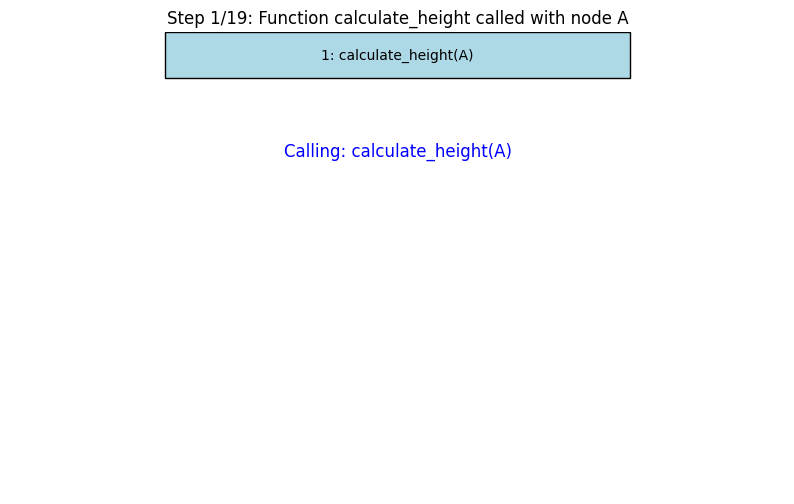

In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

# TreeNode class
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Build the tree
A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')

A.left = B
A.right = C
B.left = D
C.left = E
C.right = F

# Modified calculate_height function with improvements
def calculate_height(node, call_stack=None, call_id=None, call_records=None):
    if call_stack is None:
        call_stack = []
    if call_id is None:
        call_id = [0]
    if call_records is None:
        call_records = []
    
    call_id[0] += 1
    current_call_id = call_id[0]
    
    if node is None:
        # Log the base case
        call_records.append({
            'id': current_call_id,
            'function': 'calculate_height',
            'node': 'None',
            'return': -1,
            'call_stack': call_stack.copy()
        })
        return -1
    else:
        # Log the function call with parameters
        call_stack.append(f"{current_call_id}: calculate_height({node.value})")
        call_records.append({
            'id': current_call_id,
            'function': 'calculate_height',
            'node': node.value,
            'return': None,
            'call_stack': call_stack.copy()
        })
        
        # Recursive calls
        left_height = calculate_height(node.left, call_stack, call_id, call_records)
        right_height = calculate_height(node.right, call_stack, call_id, call_records)
        result = max(left_height, right_height) + 1
        
        # Log the return value
        call_records.append({
            'id': current_call_id,
            'function': 'calculate_height',
            'node': node.value,
            'return': result,
            'call_stack': call_stack.copy()
        })
        call_stack.pop()
        return result

# Run the function and collect call records
call_records = []
height = calculate_height(A, call_records=call_records)
print(f"Height of the tree: {height}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

def animate(i):
    ax.clear()
    # Reset the axes limits and turn off the axes
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    record = call_records[i]
    call_stack = record['call_stack']
    y_offset = 9
    stack_height = 1
    
    # Draw the call stack
    for frame in call_stack:
        rect = patches.Rectangle((2, y_offset), 6, stack_height, linewidth=1, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(5, y_offset + 0.5, frame, ha='center', va='center')
        y_offset -= stack_height + 0.2
    
    # Display function call or return value
    if record['return'] is not None:
        ax.text(5, y_offset - 0.5, f"Return: {record['return']}", ha='center', fontsize=12, color='green')
    else:
        ax.text(5, y_offset - 0.5, f"Calling: {record['function']}({record['node']})", ha='center', fontsize=12, color='blue')
    
    # Set the title
    ax.set_title(f"Step {i+1}/{len(call_records)}: Function {record['function']} called with node {record['node']}")

anim = FuncAnimation(fig, animate, frames=len(call_records), interval=1000, repeat=False)

# Display the animation (uncomment one of the options below)

# Option 1: If using Jupyter Notebook
from IPython.display import HTML
HTML(anim.to_jshtml())

# Option 2: If running as a script
# plt.show()




### Calculating the Height of a Binary Tree

Problem Statement

Calculate the height (maximum depth) of a binary tree. The height of a binary tree is the number of edges on the longest path from the root node to a leaf node.

Python Implementation

```python
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def calculate_height(node):
    if node is None:
        return -1  # Base case: empty tree has height -1
    left_height = calculate_height(node.left)
    right_height = calculate_height(node.right)
    return max(left_height, right_height) + 1
```

** Understanding the Recursion Stack**

Let's consider the following binary tree:

```
        A
       / \
      B   C
     /   / \
    D   E   F
```

**Step-by-Step Execution**

1. **Initial Call:**

   - `calculate_height(A)`

2. **Recursive Calls:**

   - `calculate_height(B)`
     - `calculate_height(D)`
       - `calculate_height(None)` returns `-1` (left child of D)
       - `calculate_height(None)` returns `-1` (right child of D)
       - `max(-1, -1) + 1 = 0` (height of D)
     - `calculate_height(None)` returns `-1` (right child of B)
     - `max(0, -1) + 1 = 1` (height of B)
   - `calculate_height(C)`
     - `calculate_height(E)`
       - `calculate_height(None)` returns `-1` (left child of E)
       - `calculate_height(None)` returns `-1` (right child of E)
       - `max(-1, -1) + 1 = 0` (height of E)
     - `calculate_height(F)`
       - `calculate_height(None)` returns `-1` (left child of F)
       - `calculate_height(None)` returns `-1` (right child of F)
       - `max(-1, -1) + 1 = 0` (height of F)
     - `max(0, 0) + 1 = 1` (height of C)
   - `max(1, 1) + 1 = 2` (height of A)

**Visualization of the Recursion Stack**

At each call, the function waits for the results of its left and right subtree heights before computing its own height.

```
Call Stack:

calculate_height(A)
├── calculate_height(B)
│   ├── calculate_height(D)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0
│   ├── calculate_height(None) => -1
│   └── Returns 1
├── calculate_height(C)
│   ├── calculate_height(E)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0
│   ├── calculate_height(F)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0
│   └── Returns 1
└── Returns 2
```

 **Explanation**

- The recursion starts at the root `A` and proceeds to the left child `B`.
- It continues down to `D`, which has no children, hitting the base case and returning `-1` for both left and right.
- The height of `D` is computed and returned up the stack.
- The process repeats for the right subtree rooted at `C`.
- Finally, the heights are combined at the root to compute the overall height.

---

### Counting the Number of Nodes in a Binary Tree

Problem Statement

Determine the total number of nodes in a binary tree.

Python Implementation

```python
def count_nodes(node):
    if node is None:
        return 0  # Base case: empty tree has 0 nodes
    left_count = count_nodes(node.left)
    right_count = count_nodes(node.right)
    return left_count + right_count + 1
```

** Understanding the Recursion Stack**

Using the same tree as before:

```
        A
       / \
      B   C
     /   / \
    D   E   F
```

**Step-by-Step Execution**

1. **Initial Call:**

   - `count_nodes(A)`

2. **Recursive Calls:**

   - `count_nodes(B)`
     - `count_nodes(D)`
       - `count_nodes(None)` returns `0`
       - `count_nodes(None)` returns `0`
       - `0 + 0 + 1 = 1` (nodes under D)
     - `count_nodes(None)` returns `0` (right child of B)
     - `1 + 0 + 1 = 2` (nodes under B)
   - `count_nodes(C)`
     - `count_nodes(E)`
       - `count_nodes(None)` returns `0`
       - `count_nodes(None)` returns `0`
       - `0 + 0 + 1 = 1` (nodes under E)
     - `count_nodes(F)`
       - `count_nodes(None)` returns `0`
       - `count_nodes(None)` returns `0`
       - `0 + 0 + 1 = 1` (nodes under F)
     - `1 + 1 + 1 = 3` (nodes under C)
   - `2 + 3 + 1 = 6` (total nodes)

**Visualization of the Recursion Stack**

```
Call Stack:

count_nodes(A)
├── count_nodes(B)
│   ├── count_nodes(D)
│   │   ├── count_nodes(None) => 0
│   │   ├── count_nodes(None) => 0
│   │   └── Returns 1
│   ├── count_nodes(None) => 0
│   └── Returns 2
├── count_nodes(C)
│   ├── count_nodes(E)
│   │   ├── count_nodes(None) => 0
│   │   ├── count_nodes(None) => 0
│   │   └── Returns 1
│   ├── count_nodes(F)
│   │   ├── count_nodes(None) => 0
│   │   ├── count_nodes(None) => 0
│   │   └── Returns 1
│   └── Returns 3
└── Returns 6
```

---

### Calculating the Depth of Nodes in a Graph Using DFS



Given an undirected graph and a starting node, calculate the depth (distance from the starting node) of each node using DFS.


```python
def dfs_depth(graph, node, depth, depths, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    depths[node] = depth
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs_depth(graph, neighbor, depth + 1, depths, visited)
```


Consider the following undirected graph:

```
A -- B -- D
|    |
C    E
```

**Adjacency List:**

```python
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A'],
    'D': ['B'],
    'E': ['B']
}
```

**Step-by-Step Execution**

1. **Initial Call:**

   - `dfs_depth(graph, 'A', 0, depths)`

2. **Recursive Calls:**

   - From `A` (depth 0):
     - Visit `B` (depth 1)
       - From `B`:
         - Visit `D` (depth 2)
           - From `D`:
             - All neighbors visited or no unvisited neighbors
         - Visit `E` (depth 2)
           - From `E`:
             - All neighbors visited or no unvisited neighbors
     - Visit `C` (depth 1)
       - From `C`:
         - All neighbors visited or no unvisited neighbors

**Depths Dictionary After Execution:**

```python
depths = {'A': 0, 'B': 1, 'D': 2, 'E': 2, 'C': 1}
```

**Visualization of the Recursion Stack**

```
dfs_depth(graph, 'A', 0, depths)
├── dfs_depth(graph, 'B', 1, depths)
│   ├── dfs_depth(graph, 'D', 2, depths)
│   │   └── Returns
│   ├── dfs_depth(graph, 'E', 2, depths)
│   │   └── Returns
│   └── Returns
├── dfs_depth(graph, 'C', 1, depths)
│   └── Returns
└── Returns
```

---

### Finding the Diameter of a Binary Tree



Compute the diameter of a binary tree, which is the length of the longest path between any two nodes in the tree. The path may or may not pass through the root.



```python
def diameter_of_binary_tree(node):
    diameter = [0]  # Use a list to hold the max diameter

    def longest_path(node):
        if node is None:
            return 0  # Base case: path length is 0
        left_path = longest_path(node.left)
        right_path = longest_path(node.right)
        # Update the diameter if the path through the current node is larger
        diameter[0] = max(diameter[0], left_path + right_path)
        return max(left_path, right_path) + 1  # Return the longest one

    longest_path(node)
    return diameter[0]
```



Using the same tree:

```
        A
       / \
      B   C
     /   / \
    D   E   F
```

 **Step-by-Step Execution**

1. **Initial Call:**

   - `diameter_of_binary_tree(A)`

2. **Recursive Calls:**

   - `longest_path(A)`
     - `longest_path(B)`
       - `longest_path(D)`
         - `longest_path(None)` returns `0`
         - `longest_path(None)` returns `0`
         - Diameter remains `0`
         - Returns `1`
       - `longest_path(None)` returns `0`
       - Diameter remains `0`
       - Returns `2`
     - `longest_path(C)`
       - `longest_path(E)`
         - `longest_path(None)` returns `0`
         - `longest_path(None)` returns `0`
         - Diameter remains `0`
         - Returns `1`
       - `longest_path(F)`
         - `longest_path(None)` returns `0`
         - `longest_path(None)` returns `0`
         - Diameter remains `0`
         - Returns `1`
       - Diameter updated to `1 + 1 = 2` (path through `C`)
       - Returns `2`
     - Diameter updated to `2 + 2 = 4` (path through `A`)
     - Returns `3`

**Final Diameter:** `4`

 **Visualization of the Recursion Stack**

```
diameter_of_binary_tree(A)
└── longest_path(A)
    ├── longest_path(B)
    │   ├── longest_path(D)
    │   │   ├── longest_path(None) => 0
    │   │   ├── longest_path(None) => 0
    │   │   └── Returns 1
    │   ├── longest_path(None) => 0
    │   └── Returns 2
    ├── longest_path(C)
    │   ├── longest_path(E)
    │   │   ├── longest_path(None) => 0
    │   │   ├── longest_path(None) => 0
    │   │   └── Returns 1
    │   ├── longest_path(F)
    │   │   ├── longest_path(None) => 0
    │   │   ├── longest_path(None) => 0
    │   │   └── Returns 1
    │   └── Returns 2
    └── Returns 3
```

---

### Assigning Ranks to Nodes in a Binary Search Tree (In-Order Traversal)



Assign a rank to each node in a Binary Search Tree (BST) based on in-order traversal, where the smallest element has rank 1.



```python
def assign_ranks(node, rank=[1]):
    if node is None:
        return
    assign_ranks(node.left, rank)
    node.rank = rank[0]
    rank[0] += 1
    assign_ranks(node.right, rank)
```



Consider the following BST:

```
       D
      / \
     B   F
    / \   \
   A   C   G
```

**Step-by-Step Execution**

1. **Initial Call:**

   - `assign_ranks(D)`

2. **Recursive Calls:**

   - `assign_ranks(B)`
     - `assign_ranks(A)`
       - `assign_ranks(None)` returns
       - Assign rank `1` to `A`
       - Increment rank to `2`
       - `assign_ranks(None)` returns
     - Assign rank `2` to `B`
     - Increment rank to `3`
     - `assign_ranks(C)`
       - `assign_ranks(None)` returns
       - Assign rank `3` to `C`
       - Increment rank to `4`
       - `assign_ranks(None)` returns
   - Assign rank `4` to `D`
   - Increment rank to `5`
   - `assign_ranks(F)`
     - `assign_ranks(None)` returns
     - Assign rank `5` to `F`
     - Increment rank to `6`
     - `assign_ranks(G)`
       - `assign_ranks(None)` returns
       - Assign rank `6` to `G`
       - Increment rank to `7`
       - `assign_ranks(None)` returns

**Visualization of the Recursion Stack**

```
assign_ranks(D)
├── assign_ranks(B)
│   ├── assign_ranks(A)
│   │   ├── assign_ranks(None)
│   │   ├── Assign rank 1 to A
│   │   ├── assign_ranks(None)
│   ├── Assign rank 2 to B
│   ├── assign_ranks(C)
│   │   ├── assign_ranks(None)
│   │   ├── Assign rank 3 to C
│   │   ├── assign_ranks(None)
├── Assign rank 4 to D
├── assign_ranks(F)
│   ├── assign_ranks(None)
│   ├── Assign rank 5 to F
│   ├── assign_ranks(G)
│   │   ├── assign_ranks(None)
│   │   ├── Assign rank 6 to G
│   │   ├── assign_ranks(None)
```

---

### Calculating the Size of a Subtree in a Graph (Post-Order DFS)



Given a tree represented as a graph (undirected and acyclic), calculate the size of the subtree rooted at each node.



```python
def subtree_sizes(graph, node, parent, sizes):
    size = 1  # Count the current node
    for neighbor in graph[node]:
        if neighbor != parent:
            size += subtree_sizes(graph, neighbor, node, sizes)
    sizes[node] = size
    return size
```

###  Understanding the Recursion Stack

Consider the following tree graph:

```
    1
   / \
  2   3
 / \
4   5
```

**Adjacency List:**

```python
graph = {
    1: [2, 3],
    2: [1, 4, 5],
    3: [1],
    4: [2],
    5: [2]
}
```



1. **Initial Call:**

   - `subtree_sizes(graph, 1, None, sizes)`

2. **Recursive Calls:**

   - From `1`:
     - Visit `2`:
       - From `2`:
         - Visit `4`:
           - From `4`:
             - Neighbor `2` is parent; skip
             - Size of `4` is `1`
         - Visit `5`:
           - From `5`:
             - Neighbor `2` is parent; skip
             - Size of `5` is `1`
         - Size of `2` is `1 (self) + 1 (4) + 1 (5) = 3`
     - Visit `3`:
       - From `3`:
         - Neighbor `1` is parent; skip
         - Size of `3` is `1`
     - Size of `1` is `1 (self) + 3 (2) + 1 (3) = 5`

**Sizes Dictionary After Execution:**

```python
sizes = {4: 1, 5: 1, 2: 3, 3: 1, 1: 5}
```

**Visualization of the Recursion Stack**

```
subtree_sizes(graph, 1, None, sizes)
├── subtree_sizes(graph, 2, 1, sizes)
│   ├── subtree_sizes(graph, 4, 2, sizes)
│   │   └── Returns 1 (size of 4)
│   ├── subtree_sizes(graph, 5, 2, sizes)
│   │   └── Returns 1 (size of 5)
│   └── Returns 3 (size of 2)
├── subtree_sizes(graph, 3, 1, sizes)
│   └── Returns 1 (size of 3)
└── Returns 5 (size of 1)
```

---

### Visualizing the Recursion Stack

To effectively visualize the recursion stack:

- **Use Indentation or Tree Structures:** Indent each recursive call to represent depth.
- **Track Variables:** Note the values of key variables at each call.
- **Draw Diagrams:** Sketch the call stack as a tree diagram.

**Example Diagram for Height Calculation:**

```
calculate_height(A)
├── calculate_height(B)
│   ├── calculate_height(D)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0 (D's height)
│   ├── calculate_height(None) => -1
│   └── Returns 1 (B's height)
├── calculate_height(C)
│   ├── calculate_height(E)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0 (E's height)
│   ├── calculate_height(F)
│   │   ├── calculate_height(None) => -1
│   │   ├── calculate_height(None) => -1
│   │   └── Returns 0 (F's height)
│   └── Returns 1 (C's height)
└── Returns 2 (A's height)
```

---

### Tips for Understanding Recursion Stacks

- **Base Case Identification:** Always identify and understand the base case; it stops the recursion.
- **Recursive Case:** Understand how each recursive call reduces the problem size.
- **Think in Terms of Stack Frames:** Each recursive call adds a new frame to the call stack.
- **Backtracking:** Recognize when the function backtracks and combines results.
- **Practice with Examples:** Work through examples with different tree and graph structures.



 Sum of All Node Values in a Binary Tree

```python
def sum_of_nodes(node):
    if node is None:
        return 0
    left_sum = sum_of_nodes(node.left)
    right_sum = sum_of_nodes(node.right)
    return left_sum + right_sum + node.value
```

**Visualization:**

- Each call waits for the sums of the left and right subtrees.
- The sums are combined with the current node's value.

Checking if a Tree is Balanced

A tree is balanced if the heights of the two child subtrees of any node never differ by more than one.

```python
def is_balanced(node):
    def check_balance(node):
        if node is None:
            return 0
        left_height = check_balance(node.left)
        if left_height == -1:
            return -1
        right_height = check_balance(node.right)
        if right_height == -1:
            return -1
        if abs(left_height - right_height) > 1:
            return -1
        return max(left_height, right_height) + 1
    return check_balance(node) != -1
```

**Visualization:**

- The function returns `-1` if an imbalance is detected.
- The recursion stack unwinds immediately upon detecting an imbalance.


